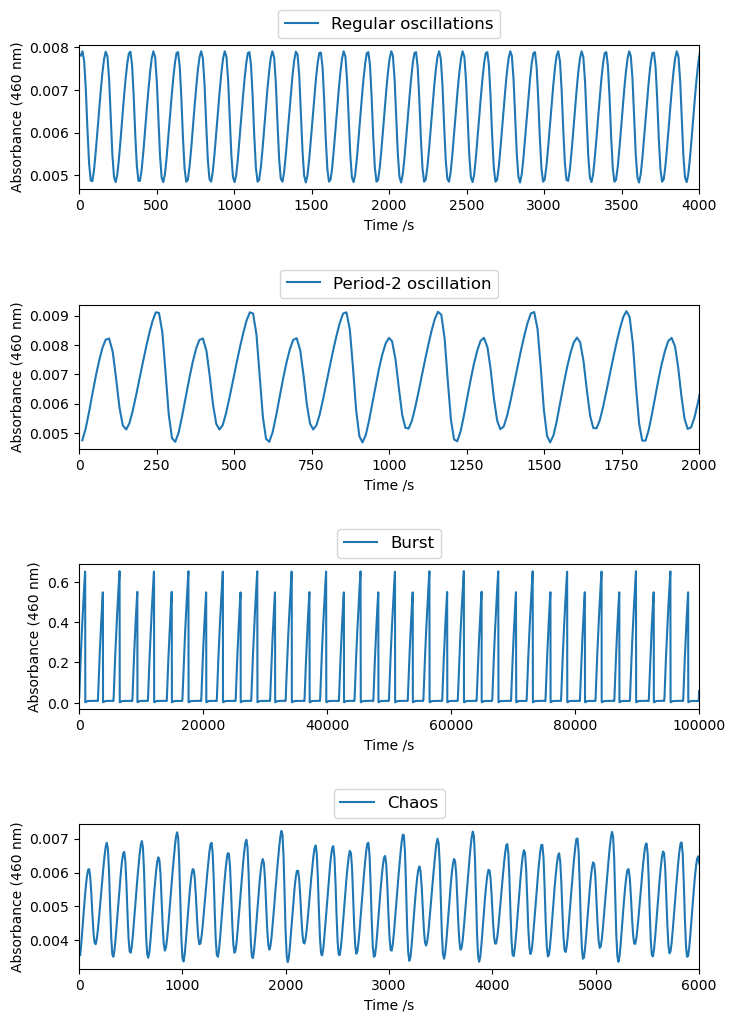

       Time /s  Abs Max  Abs Max+n
0       21.287  0.00790    0.00789
1      171.140  0.00789    0.00789
2      330.890  0.00789    0.00790
3      478.880  0.00790    0.00788
4      638.520  0.00788    0.00790
..         ...      ...        ...
629  99174.000  0.00788    0.00790
630  99322.000  0.00790    0.00788
631  99481.000  0.00788    0.00790
632  99630.000  0.00790    0.00790
633  99782.000  0.00790    0.00788

[634 rows x 3 columns]


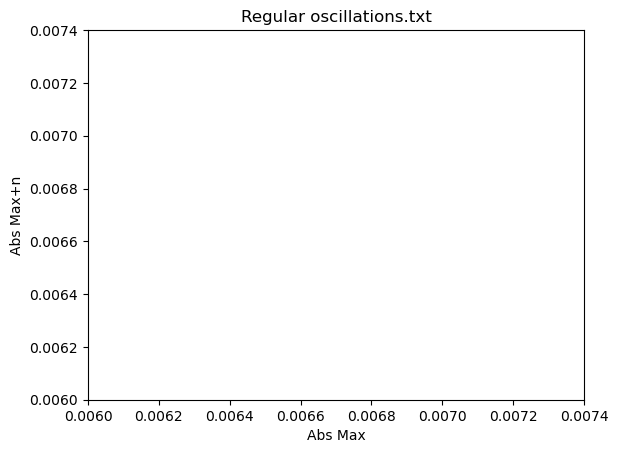

       Time /s  Abs Max  Abs Max+n
0       96.607  0.00822    0.00911
1      247.350  0.00911    0.00822
2      399.200  0.00822    0.00911
3      550.670  0.00911    0.00823
4      701.760  0.00823    0.00911
..         ...      ...        ...
654  99131.000  0.00824    0.00912
655  99293.000  0.00912    0.00824
656  99431.000  0.00824    0.00915
657  99591.000  0.00915    0.00823
658  99738.000  0.00823    0.00915

[659 rows x 3 columns]


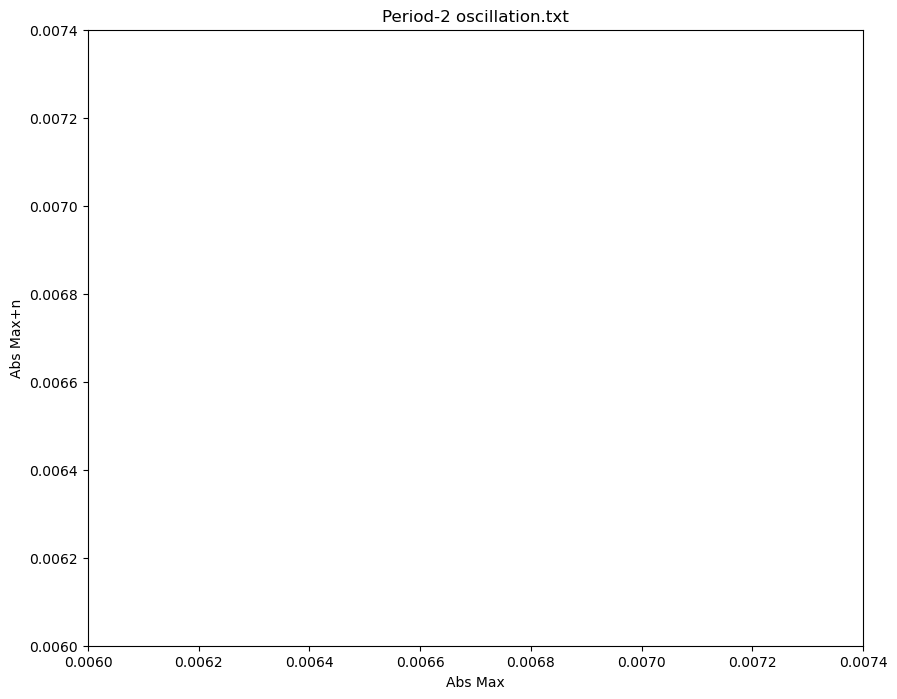

      Time /s  Abs Max  Abs Max+n
0      961.09  0.65070    0.00983
1     2846.50  0.00983    0.01040
2     2936.60  0.01040    0.54787
3     3821.10  0.54787    0.00957
4     5169.30  0.00957    0.00962
..        ...      ...        ...
136  97333.00  0.01040    0.54781
137  98217.00  0.54781    0.00956
138  99574.00  0.00956    0.00963
139  99644.00  0.00963    0.00979
140  99745.00  0.00979    0.01027

[141 rows x 3 columns]


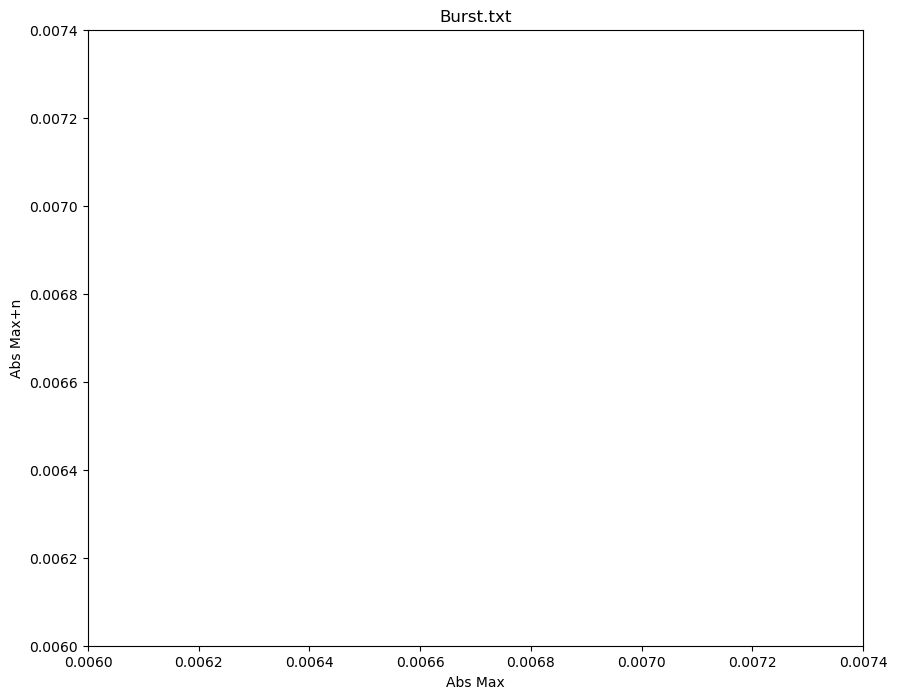

       Time /s  Abs Max  Abs Max+n
0       97.052  0.00610    0.00688
1      267.490  0.00688    0.00661
2      436.630  0.00661    0.00693
3      606.750  0.00693    0.00645
4      766.020  0.00645    0.00719
..         ...      ...        ...
558  98938.000  0.00640    0.00721
559  99120.000  0.00721    0.00608
560  99271.000  0.00608    0.00684
561  99454.000  0.00684    0.00665
562  99612.000  0.00665    0.00660

[563 rows x 3 columns]


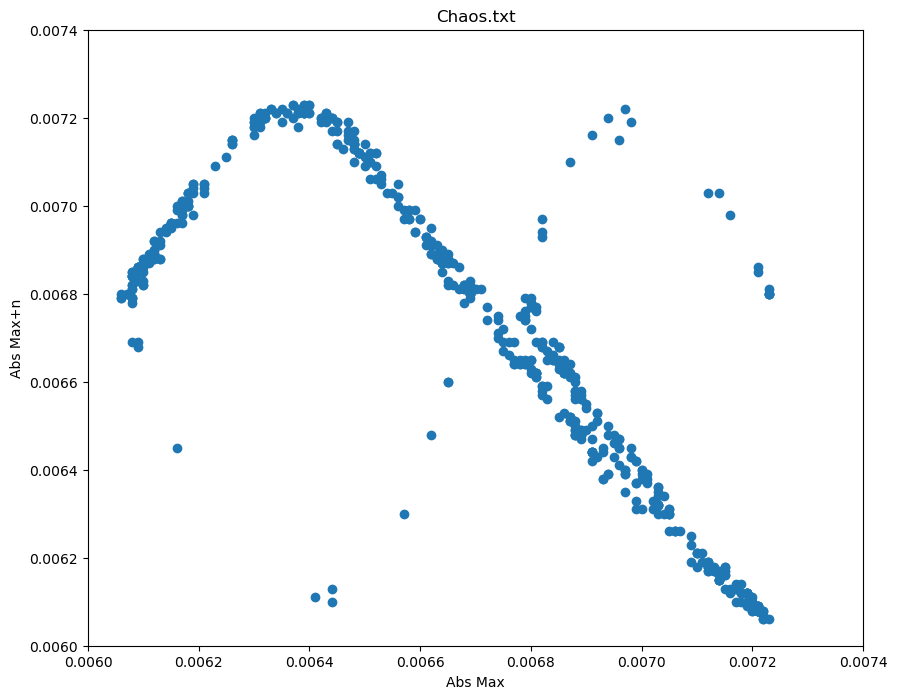

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the file names and corresponding plot labels
data_files = [
    {'file_name': 'Regular oscillations.txt', 'label': 'Regular oscillations', 'xlim': [0, 4000]},
    {'file_name': 'Period-2 oscillation.txt', 'label': 'Period-2 oscillation', 'xlim': [0, 2000]},
    {'file_name': 'Burst.txt', 'label': 'Burst', 'xlim': [0, 100000]},
    {'file_name': 'Chaos.txt', 'label': 'Chaos', 'xlim': [0, 6000]}
]

# Load and plot the data
fig, axes = plt.subplots(nrows=len(data_files), ncols=1, figsize=(8,12))
for i, file_data in enumerate(data_files):
    data = np.loadtxt(file_data['file_name'], skiprows=1)
    x = data[:,0]
    y = data[:,1]
    axes[i].plot(x, y, label=file_data['label'])
    axes[i].set_xlim(file_data['xlim'])
    axes[i].set_xlabel('Time /s')
    axes[i].set_ylabel('Absorbance (460 nm)')
    axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=1, fontsize='large')

plt.subplots_adjust(hspace=0.8)
plt.show()

# Import data
data_files = ['Regular oscillations.txt', 'Period-2 oscillation.txt', 'Burst.txt', 'Chaos.txt']

# Define the column names for the data frames
col_names = ["Time /s","Abs Max"]

# Loop through the data files, find the max points and build a data frame for each file
for file in data_files:
    data = np.loadtxt(file, skiprows=1)
    x = data[:,0] 
    y = data[:,1] 
    
    max_points = []
    prev_point = y[0]
    for i in range(1,len(y)-1):
        if y[i] > prev_point and y[i] > y[i+1]:
            max_points.append((x[i],y[i]))
        prev_point = y[i]
    
    df = pd.DataFrame(max_points, columns=col_names)
    df["Abs Max+n"] = df["Abs Max"].shift(-1)               #create a new column
    df = df[:-1]                                            #remove the last row

    plt.scatter(df["Abs Max"], df["Abs Max+n"])             #Create the scatter plot
    plt.xlabel("Abs Max")
    plt.ylabel("Abs Max+n")
    plt.xlim(0.006,0.0074)
    plt.ylim(0.006,0.0074)
    plt.title(file)
    plt.rcParams['figure.figsize'] = [10, 8]
    print(df)
    plt.show()

    
